Team 1 - Rainbow Team


#BUSINESS UNDERSTANDING
Kota Semarang, sebagai ibu kota Jawa Tengah dan kota pesisir, rentan terhadap bencana banjir, terutama banjir rob. Bencana ini dapat mengakibatkan kerugian ekonomi dan sosial yang signifikan. Untuk meminimalisir dampak negatif tersebut, diperlukan sistem prediksi yang akurat dan handal untuk mengantisipasi potensi bencana banjir. Oleh karena itu, diperlukan solusi berbasis machine learning yang diharapkan mampu menganalisis pola curah hujan dengan akurasi tinggi. Dengan dataset iklim (2020–2024), peluang untuk memahami pola iklim untuk mempresiksi curah hujan berpotensi banjir yang menjadi faktor penting untuk mendukung pengambilan keputusan strategis.

1. **Goal/Title** :

    Prediksi Curah Hujan Berpotensi Banjir di Kota Semarang Menggunakan Metode Machine Learning


2. **Modelling** :
*   Data yang Digunakan, Data iklim harian Kota Semarang tahun 2020-2024, meliputi suhu minimum dan maksimum, suhu rata-rata, kelembaban rata-rata, curah hujan, durasi penyinaran matahari, kecepatan angin, dan arah angin.
*   Preprocessing Data : Data yang digunakan akan di-preprocessing terlebih dahulu, seperti :

    Handling Missing Value : Interpolasi untuk data kontinu dan modus untuk data kategorikal.

    Encoding Data Kategorikal : Label Encoder untuk mengubah data kategorikal (arah angin) ke numerik.

    Datetime fitur Tanggal : Mengubah tipe data object pada Tanggal menjadi datetime


3. **Algoritma yang Digunakan** :

* Estimasi Curah Hujan :
Random Forest Regressor,
ANN (Artificial Neural Network),
Linear Regression.
* Prediksi Time Series :
Holt-Winters Exponential Smoothing.


4. **Evaluasi Model** :
* R-squared (R2)
* Mean Absolute Percentage Error (MAPE)


In [124]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [125]:
path = '/content/laporan_iklim_harian.xlsx'
load_data_iklim = pd.read_excel(path)
load_data_iklim.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2020,24.2,31.4,27.0,88.0,9.6,3.6,6.0,280.0,4.0,W
1,02-01-2020,24.0,31.0,27.4,87.0,16.7,3.4,6.0,280.0,3.0,W
2,03-01-2020,24.8,32.2,28.4,84.0,2.0,2.5,7.0,270.0,3.0,W
3,04-01-2020,22.0,31.4,27.1,90.0,36.6,4.6,8.0,270.0,2.0,C
4,05-01-2020,25.4,30.4,26.8,92.0,3.7,0.8,6.0,270.0,2.0,C


Keterangan :

Tn: Suhu Minimum (°C)

Tx: Suhu Maksimum (°C)

Tavg: Suhu Rata-rata (°C)

RH_avg: Kelembaban Rata-rata (%)

RR: Curah Hujan (mm)

ss: Durasi Penyinaran Matahari (jam)

ff_x: Kecepatan Angin Maksimum (m/s)

ddd_x: Arah Angin pada Kecepatan Maksimum (°)

ff_avg: Kecepatan Angin Rata-rata (m/s)

ddd_car: Arah Angin Paling Umum (°)


#DATA UNDERSTANDING

In [126]:
df = pd.DataFrame(load_data_iklim)
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2020,24.2,31.4,27.0,88.0,9.6,3.6,6.0,280.0,4.0,W
1,02-01-2020,24.0,31.0,27.4,87.0,16.7,3.4,6.0,280.0,3.0,W
2,03-01-2020,24.8,32.2,28.4,84.0,2.0,2.5,7.0,270.0,3.0,W
3,04-01-2020,22.0,31.4,27.1,90.0,36.6,4.6,8.0,270.0,2.0,C
4,05-01-2020,25.4,30.4,26.8,92.0,3.7,0.8,6.0,270.0,2.0,C


In [127]:
# Menampilkan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  1827 non-null   object 
 1   Tn       1819 non-null   float64
 2   Tx       1820 non-null   float64
 3   Tavg     1818 non-null   float64
 4   RH_avg   1812 non-null   float64
 5   RR       1776 non-null   float64
 6   ss       1774 non-null   float64
 7   ff_x     1826 non-null   float64
 8   ddd_x    1826 non-null   float64
 9   ff_avg   1826 non-null   float64
 10  ddd_car  1826 non-null   object 
dtypes: float64(9), object(2)
memory usage: 157.1+ KB


In [128]:
# Statistik deskriptif untuk variabel numerik
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,1819.000000,1820.000000,1818.000000,1812.000000,1776.000000,1774.000000,1826.000000,1826.000000,1826.000000
mean,24.932380,32.855440,28.641419,78.488273,7.777002,6.584710,5.329409,233.493839,2.058735
std,1.142172,1.771508,1.264618,7.690474,17.823925,2.869265,1.413339,115.652077,0.693961
min,19.000000,26.200000,24.500000,52.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,24.200000,31.600000,27.800000,73.000000,0.000000,4.800000,4.000000,110.000000,2.000000
50%,25.000000,32.800000,28.600000,79.000000,0.000000,7.200000,5.000000,280.000000,2.000000
75%,25.600000,34.000000,29.400000,84.000000,7.400000,8.800000,6.000000,340.000000,2.000000
max,28.000000,38.800000,32.400000,96.000000,203.200000,15.500000,13.000000,360.000000,6.000000


#DATA PREPROCESSING

In [129]:
# Mengecek missing value
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Tanggal     0
Tn          8
Tx          7
Tavg        9
RH_avg     15
RR         51
ss         53
ff_x        1
ddd_x       1
ff_avg      1
ddd_car     1
dtype: int64


In [130]:
#Mengatasi missing value dengan interpolasi karena data bersifat kontinu
df['Tn'] = df['Tn'].interpolate()
df['Tx'] = df['Tx'].interpolate()
df['Tavg'] = df['Tavg'].interpolate()
df['ff_avg'] = df['ff_avg'].interpolate()
df['RH_avg'] = df['RH_avg'].interpolate()
df['RR'] = df['RR'].interpolate()
df['ss'] = df['ss'].interpolate()
df['ddd_x'] = df['ddd_x'].interpolate()
df['ff_x'] = df['ff_x'].interpolate()

In [131]:
# Mengatasi missing value dengan modus pada data bersifat kategorikal
df['ddd_car'] = df['ddd_car'].fillna(df['ddd_car'].mode()[0])

In [132]:
# Mengecek ulang missing value
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64


In [133]:
# Menampilkan dataframe jumlah RR
df['RR'].value_counts()

,count
RR,
0.000000,937
0.200000,25
1.000000,25
0.400000,21
0.600000,19
...,...
33.000000,1
52.500000,1
41.700000,1


In [134]:
# Menampilkan dataframe jumlah ddd_car
df['ddd_car'].value_counts()

,count
ddd_car,
C,1172
E,201
W,164
N,161
NW,58
SE,56
NE,12
SW,3


Keterangan Arah Angin :

* C (Calm) : Tidak ada arah angin dominan karena kecepatan angin berada di bawah ambang batas yang terdeteksi.
* E (East) : Angin yang bertiup dari arah timur
* W (West) : Angin yang bertiup dari arah barat
* N (Nort) : Angin yang bertiup dari arah utara
* NW (Nortwest) : Angin yang bertiup dari arah barat laut
* SE (Southeast) : Angin yang bertiup dari arah tenggara
* NE (Northeast) : Angin yang bertiup arah timur laut
* SW (Southwest) : Angin yang bertiup arah barat daya

In [135]:
# # dowload preprocessing excel

# from google.colab import files
# df.to_excel('preprocessed_data.xlsx', index=False)
# files.download('preprocessed_data.xlsx')

In [136]:
# Encoding variabel ddd_car (arah angin)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ddd_car'] = le.fit_transform(df['ddd_car'])

In [137]:
# Menampilkan hasil encoder ddd_car
df['ddd_car'].value_counts()

,count
ddd_car,
0,1172
1,201
7,164
2,161
4,58
5,56
3,12
6,3


In [138]:
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2020,24.2,31.4,27.0,88.0,9.6,3.6,6.0,280.0,4.0,7
1,02-01-2020,24.0,31.0,27.4,87.0,16.7,3.4,6.0,280.0,3.0,7
2,03-01-2020,24.8,32.2,28.4,84.0,2.0,2.5,7.0,270.0,3.0,7
3,04-01-2020,22.0,31.4,27.1,90.0,36.6,4.6,8.0,270.0,2.0,0
4,05-01-2020,25.4,30.4,26.8,92.0,3.7,0.8,6.0,270.0,2.0,0


In [139]:
# Dowload preprocessing excel

# from google.colab import files
# df.to_excel('preprocessed_data.xlsx', index=False)
# files.download('preprocessed_data.xlsx')

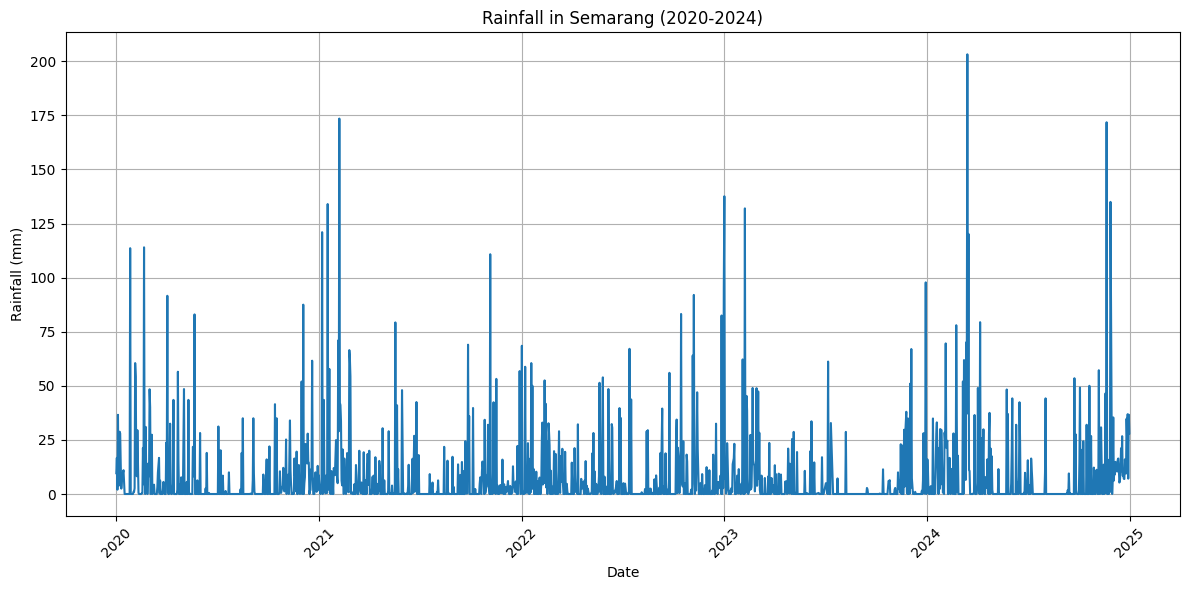

In [140]:
# Convert 'Tanggal' column to datetime if it's not already
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y') # Specify the correct format

# Filter data for the years 2020-2024
df_filtered = df[(df['Tanggal'].dt.year >= 2020) & (df['Tanggal'].dt.year <= 2024)]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Tanggal'], df_filtered['RR'])
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall in Semarang (2020-2024)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#PEMODELAN

##ESTIMASI

In [141]:
# Define features (X) and target (y)
from sklearn.model_selection import train_test_split
#input variable
X=df[['Tn',	'Tx',	'Tavg',	'RH_avg',	'ss',	'ff_x',	'ddd_x',	'ff_avg',	'ddd_car']]
y = df['RR']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Pemodelan estimasi menggunakan algoritma regresi

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df' is your preprocessed DataFrame with 'RR' as the target variable
# and other relevant features.

# Initialize and train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred)
mape_rf = mean_absolute_percentage_error(y_test, y_pred)

mape_rf_percentage = mape_rf * 100

print(f"R-squared (R2): {r2_rf}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf_percentage}%")



R-squared (R2): -0.06115759715959945
Mean Absolute Percentage Error (MAPE): 1.227574477702107e+18%


In [143]:
# Model ann (artificial neural network)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# ... (Your existing code for data loading and preprocessing) ...

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1) # Adjust epochs and batch_size

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2_ann = r2_score(y_test, y_pred)
mape_ann = mean_absolute_percentage_error(y_test, y_pred)

mape_ann_percentage = mape_ann * 100

print(f"R-squared (R2): {r2_ann}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ann_percentage}%")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 343.6662
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 448.3400
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 312.7639
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 239.7779
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 293.5267
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.5674
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 219.5976
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 289.5643
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251.7769
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 304.0862
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 338.9349
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 263.3171
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 358.2736
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 214.7901
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.7403


In [144]:
from sklearn.linear_model import LinearRegression

# Initialize and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
r2_linear = r2_score(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
mape_linear_percentage = mape_linear * 100


print(f"Linear Regression - R-squared (R2): {r2_linear}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_linear_percentage}%")

Linear Regression - R-squared (R2): 0.07514263322860537
Mean Absolute Percentage Error (MAPE): 1.5456995236559636e+18%


In [145]:
# Create a dictionary to store evaluation metrics
evaluation_data = {
    'Model': ['Random Forest', 'ANN', 'Linear Regression'],
    'R2': [r2_rf, r2_ann, r2_linear],
    'MAPE': [mape_rf_percentage, mape_ann_percentage, mape_linear_percentage] # MAPE in percentage
}

# Create the evaluation DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

# Display the DataFrame
evaluation_df

,Model,R2,MAPE
0,Random Forest,-0.061158,1.227574e+18
1,ANN,0.109585,1.193469e+18
2,Linear Regression,0.075143,1.545700e+18


* R² (Coefficient of Determination): 0.109585 (tertinggi, artinya ANN menjelaskan variabilitas target lebih baik).
* MAPE (Mean Absolute Percentage Error): 1.193469... (terendah, menunjukkan proporsi kesalahan lebih kecil).

Kesimpulan: Model ANN memberikan performa terbaik secara keseluruhan pada data Anda dibandingkan Random Forest dan Linear Regression.

##PREDICTION TIME SERIES

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1200x800 with 0 Axes>

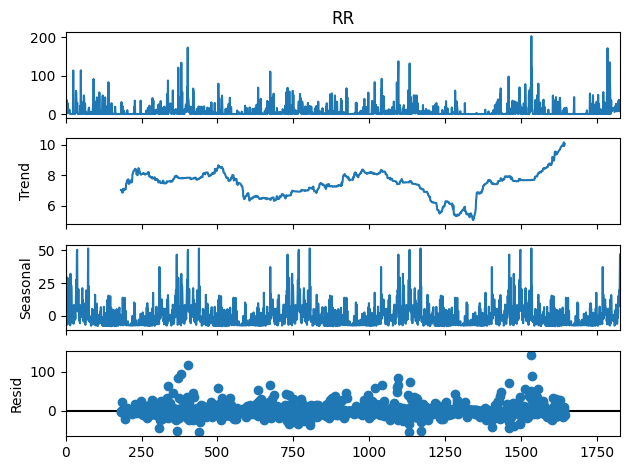

In [147]:
# Seosanal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['RR'], model='additive', period=365) #period=365 because it's yearly data

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [148]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')

# Membuat range tanggal lengkap dari tanggal terawal hingga terakhir
tanggal_awal = df['Tanggal'].min()
tanggal_akhir = df['Tanggal'].max()
range_tanggal = pd.date_range(start=tanggal_awal, end=tanggal_akhir, freq='D')

# Membuat DataFrame dengan range tanggal lengkap
df_tanggal_lengkap = pd.DataFrame({'Tanggal': range_tanggal})

# Menggabungkan dengan data curah hujan
df_curahhujan = df.groupby('Tanggal')['RR'].sum().reset_index()

# Gabungkan df_tanggal_lengkap dengan df_curahhujan
df_final = pd.merge(df_tanggal_lengkap, df_curahhujan, on='Tanggal', how='left')

# Isi nilai NaN pada 'RR' dengan 0 (atau strategi lain yang sesuai)
df_final['RR'].fillna(0, inplace=True)

df_final

<ipython-input-148-d6201bcd0299>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['RR'].fillna(0, inplace=True)


,Tanggal,RR
0,2020-01-01,9.600000
1,2020-01-02,16.700000
2,2020-01-03,2.000000
3,2020-01-04,36.600000
4,2020-01-05,3.700000
...,...,...
1822,2024-12-27,24.805791
1823,2024-12-28,36.891858
1824,2024-12-29,7.104049
1825,2024-12-30,36.626264


In [149]:
# Holt-Winters Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming df_curahhujan is your time series data with 'RR' as the target variable
# and a DatetimeIndex. The data should be indexed by date.

# Split the data into training and testing sets
# Filter data based on the 'Tanggal' column's year
train_data = df_final[(df_final['Tanggal'].dt.year >= 2020) & (df_final['Tanggal'].dt.year <= 2022)] # 60% data training
test_data = df_final[(df_final['Tanggal'].dt.year >= 2023) & (df_final['Tanggal'].dt.year <= 2024)] # 40% data testing


# Fit the Holt-Winters model
model = ExponentialSmoothing(train_data['RR'], trend='add', seasonal='add', seasonal_periods=365) # Adjust seasonal_periods if needed
results = model.fit()

# Forecast for 2025
forecast_steps = 365
forecast = results.forecast(steps=forecast_steps)

# Create a date range for the forecast
forecast_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediction_RR': forecast})

# Evaluate the model on the test set
predictions = results.forecast(steps=len(test_data))
r2_hw = r2_score(test_data['RR'], predictions)
mape_hw = mean_absolute_percentage_error(test_data['RR'], predictions)

print(f"Holt-Winters - R-squared (R2): {r2_hw}")
print(f"Holt-Winters - Mean Absolute Percentage Error (MAPE): {mape_hw}")



# Print or use the forecast DataFrame
forecast_df

Holt-Winters - R-squared (R2): -0.1480048886225518
Holt-Winters - Mean Absolute Percentage Error (MAPE): 1.735233273818152e+16


,Tanggal,Prediction_RR
1096,2025-01-01,31.368469
1097,2025-01-02,4.148746
1098,2025-01-03,14.085093
1099,2025-01-04,4.219067
1100,2025-01-05,11.512879
...,...,...
1456,2025-12-27,29.510110
1457,2025-12-28,20.641089
1458,2025-12-29,31.779668
1459,2025-12-30,2.624051


#DEPLOYMENT

In [150]:
#Kategorikal Intensitas Curah Hujan
def kategori_hujan(rr):
    if 0 <= rr < 0.5:
        return "Tidak Hujan/Berawan"
    elif 0.5 <= rr <= 20:
        return "Hujan Ringan"
    elif 20 <= rr <= 50:
        return "Hujan Sedang"
    elif 50 <= rr <= 100:
        return "Hujan Lebat"
    elif 100 <= rr <= 150:
        return "Hujan Sangat Lebat"
    elif rr > 150:
        return "Hujan Ekstrim"
    else:
        return "Data Tidak Valid"

df['kategori_hujan'] = df['RR'].apply(kategori_hujan)
# Menampilkan data dengan kolom baru
df[['RR', 'kategori_hujan']]

,RR,kategori_hujan
0,9.600000,Hujan Ringan
1,16.700000,Hujan Ringan
2,2.000000,Hujan Ringan
3,36.600000,Hujan Sedang
4,3.700000,Hujan Ringan
...,...,...
1822,24.805791,Hujan Sedang
1823,36.891858,Hujan Sedang
1824,7.104049,Hujan Ringan
1825,36.626264,Hujan Sedang


In [151]:
# Jumlah kategori hujan pada tahun 2020-2024
df['kategori_hujan'].value_counts()

,count
kategori_hujan,
Tidak Hujan/Berawan,1003
Hujan Ringan,603
Hujan Sedang,163
Hujan Lebat,46
Hujan Sangat Lebat,9
Hujan Ekstrim,3


In [152]:
# Kategori hujan lebat dan hujan sangat lebat

# Display data where 'kategori_hujan' is "Hujan Lebat" or "Hujan Sangat Lebat"
lebat_sangat_lebat = df[df['kategori_hujan'].isin(["Hujan Lebat", "Hujan Sangat Lebat"])]
lebat_sangat_lebat[['Tanggal', 'RR', 'kategori_hujan']].head()

,Tanggal,RR,kategori_hujan
25,2020-01-26,113.6,Hujan Sangat Lebat
34,2020-02-04,60.5,Hujan Lebat
35,2020-02-05,54.2,Hujan Lebat
50,2020-02-20,114.0,Hujan Sangat Lebat
92,2020-04-02,91.6,Hujan Lebat


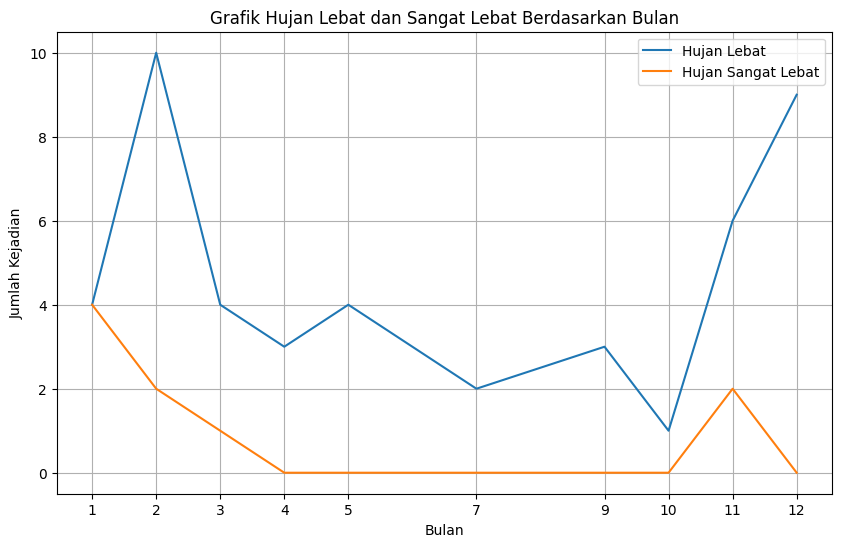

In [153]:
# Grafik hujan lebat dan hujan sangat lebat

import matplotlib.pyplot as plt

# Assuming 'lebat_sangat_lebat' DataFrame from your code
# ... (Your existing code) ...

# Group data by month and count occurrences of "Hujan Lebat" and "Hujan Sangat Lebat"
monthly_rain = lebat_sangat_lebat.groupby(lebat_sangat_lebat['Tanggal'].dt.month)['kategori_hujan'].value_counts().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_rain.index, monthly_rain['Hujan Lebat'], label='Hujan Lebat')
plt.plot(monthly_rain.index, monthly_rain['Hujan Sangat Lebat'], label='Hujan Sangat Lebat')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejadian')
plt.title('Grafik Hujan Lebat dan Sangat Lebat Berdasarkan Bulan')
plt.xticks(monthly_rain.index) # Ensure all month ticks are shown
plt.legend()
plt.grid(True)
plt.show()

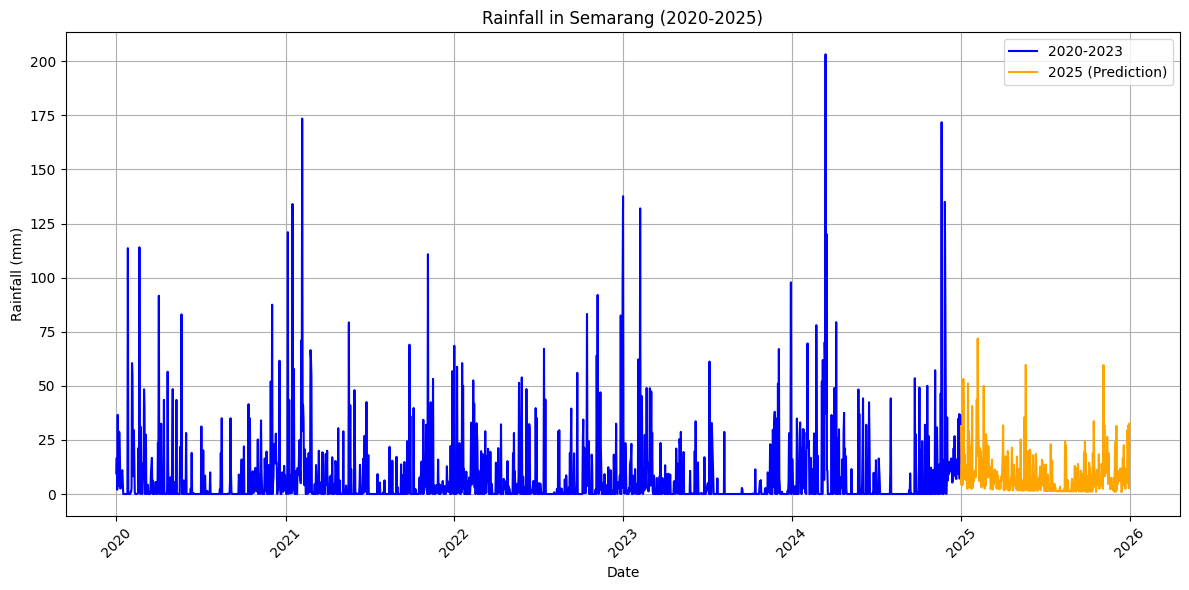

In [154]:
# Grafik Curah Hujan 2020-2025

# Create the plot
plt.figure(figsize=(12, 6))

# Plot historical data (2020-2024) in blue
plt.plot(df_final[df_final['Tanggal'].dt.year < 2025]['Tanggal'], df_final[df_final['Tanggal'].dt.year < 2025]['RR'], color='blue', label='2020-2023')

# Plot predicted data (2025) in orange
plt.plot(forecast_df['Tanggal'], forecast_df['Prediction_RR'], color='orange', label='2025 (Prediction)')

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall in Semarang (2020-2025)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [155]:
# Forcest RR pada tahun 2025
forecast_df

,Tanggal,Prediction_RR
1096,2025-01-01,31.368469
1097,2025-01-02,4.148746
1098,2025-01-03,14.085093
1099,2025-01-04,4.219067
1100,2025-01-05,11.512879
...,...,...
1456,2025-12-27,29.510110
1457,2025-12-28,20.641089
1458,2025-12-29,31.779668
1459,2025-12-30,2.624051


In [156]:
#Kategorikal Intensitas Curah Hujan
def kategori_hujan(Prediction_RR):
    if 0 <= Prediction_RR < 0.5:
        return "Tidak Hujan/Berawan"
    elif 0.5 <= Prediction_RR <= 20:
        return "Hujan Ringan"
    elif 20 <= Prediction_RR <= 50:
        return "Hujan Sedang"
    elif 50 <= Prediction_RR <= 100:
        return "Hujan Lebat"
    elif 100 <= Prediction_RR <= 150:
        return "Hujan Sangat Lebat"
    elif Prediction_RR > 150:
        return "Hujan Ekstrim"
    else:
        return "Data Tidak Valid"
# Apply the 'kategori_hujan' function to the 'Prediction_RR' column of forecast_df
forecast_df['kategori_hujan'] = forecast_df['Prediction_RR'].apply(kategori_hujan)

# Display the forecast DataFrame with the new 'kategori_hujan' column
forecast_df

,Tanggal,Prediction_RR,kategori_hujan
1096,2025-01-01,31.368469,Hujan Sedang
1097,2025-01-02,4.148746,Hujan Ringan
1098,2025-01-03,14.085093,Hujan Ringan
1099,2025-01-04,4.219067,Hujan Ringan
1100,2025-01-05,11.512879,Hujan Ringan
...,...,...,...
1456,2025-12-27,29.510110,Hujan Sedang
1457,2025-12-28,20.641089,Hujan Sedang
1458,2025-12-29,31.779668,Hujan Sedang
1459,2025-12-30,2.624051,Hujan Ringan


In [157]:
# # download hasil prediksi tahun 2025 excel

# # Assuming forecast_df is your DataFrame with 'Tanggal' and 'Prediction_RR' columns
# # ... (Your existing code) ...

# # Create a new DataFrame for the prediction results
# hasil_prediksi_2025 = forecast_df[['Tanggal', 'Prediction_RR', 'kategori_hujan']].copy()

# # Save the DataFrame to an Excel file
# hasil_prediksi_2025.to_excel('hasil_prediksi_2025.xlsx', index=False)

# # Download the Excel file
# from google.colab import files
# files.download('hasil_prediksi_2025.xlsx')

In [158]:
#Jumlah Kategori Hujan
forecast_df['kategori_hujan'].value_counts()

,count
kategori_hujan,
Hujan Ringan,325
Hujan Sedang,35
Hujan Lebat,5


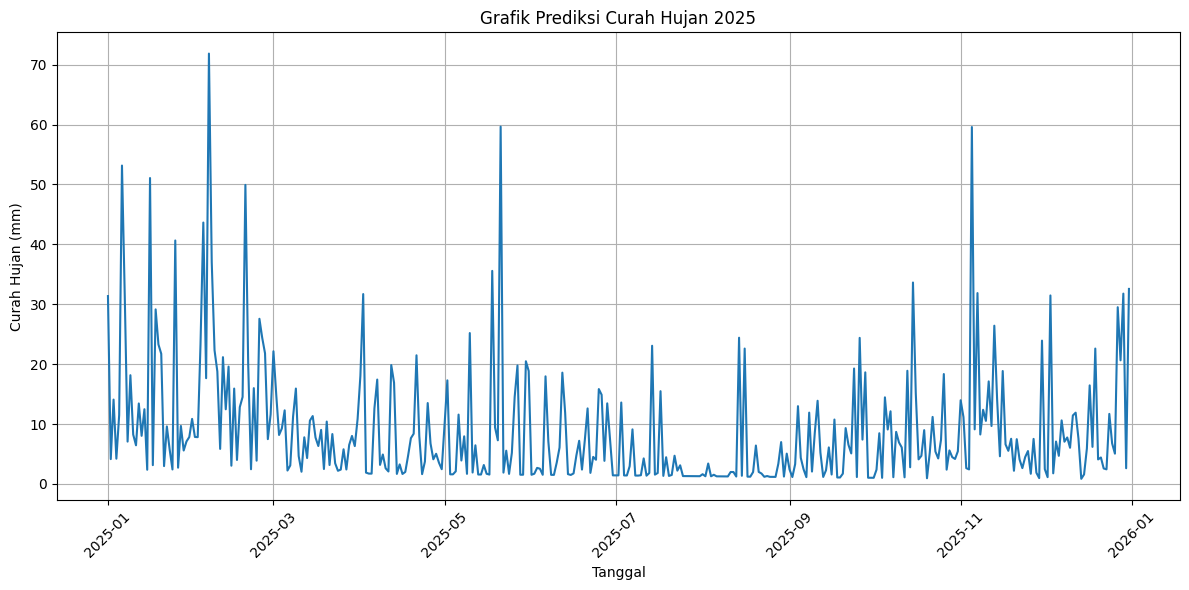

In [159]:
# Grafik Prediksi Curah Hujan 2025

# Filter for 2025
forecast_2025 = forecast_df[forecast_df['Tanggal'].dt.year == 2025]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(forecast_2025['Tanggal'], forecast_2025['Prediction_RR'])
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.title('Grafik Prediksi Curah Hujan 2025')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

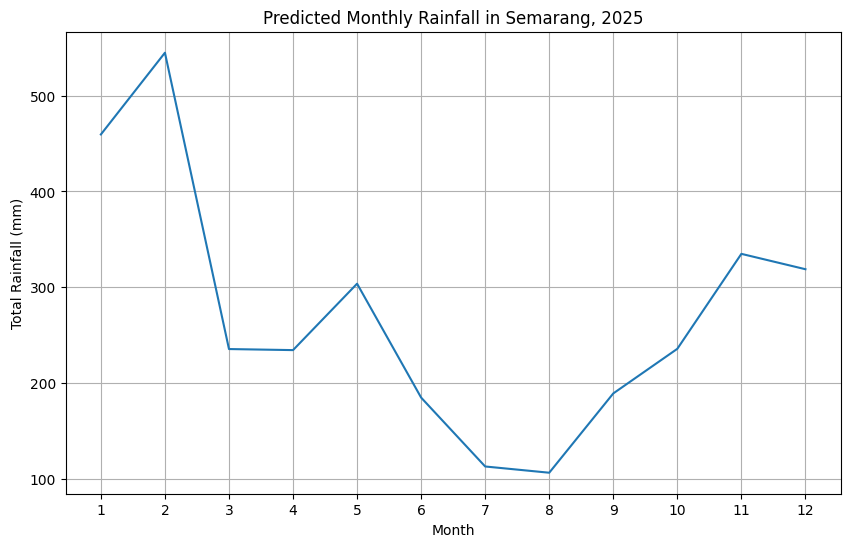

In [160]:
# Grafik curah hujan tahun 2025 berdasarkan bulan
# Group the forecast data by month and sum the predicted rainfall
monthly_forecast = forecast_df.groupby(forecast_df['Tanggal'].dt.month)['Prediction_RR'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_forecast.index, monthly_forecast.values)
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Predicted Monthly Rainfall in Semarang, 2025')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.grid(True)
plt.show()

In [161]:
# Prediksi curah hujan tahun 2025 yang berpotensi terjad bencana banjir

def prediksi_banjir(df):
  """
  Memprediksi potensi banjir berdasarkan data curah hujan.

  Args:
    df: DataFrame yang berisi data curah hujan dengan kolom 'Tanggal' dan 'RR_prediction',
       serta kolom 'kategori_hujan' yang dihasilkan dari fungsi kategori_hujan.

  Returns:
    DataFrame yang berisi tanggal-tanggal di tahun 2025 yang berpotensi banjir
    (curah hujan lebat atau sangat lebat).
  """

  # Filter data untuk tahun 2025
  df_2025 = df[df['Tanggal'].dt.year == 2025]

  # Filter data dengan kategori hujan "Hujan Lebat" atau "Hujan Sangat Lebat"
  potensi_banjir = df_2025[df_2025['kategori_hujan'].isin(["Hujan Lebat", "Hujan Sangat Lebat"])]

  return potensi_banjir[['Tanggal', 'Prediction_RR', 'kategori_hujan']]

# Memanggil fungsi prediksi_banjir dengan DataFrame 'future_df'
potensi_banjir_2025 = prediksi_banjir(forecast_df)
potensi_banjir_2025

,Tanggal,Prediction_RR,kategori_hujan
1101,2025-01-06,53.160954,Hujan Lebat
1111,2025-01-16,51.077828,Hujan Lebat
1132,2025-02-06,71.853424,Hujan Lebat
1236,2025-05-21,59.661321,Hujan Lebat
1404,2025-11-05,59.591614,Hujan Lebat


In [162]:
# Kategori Curah Hujan 2025 yang berpotensi banjir

def categorize_flood_potential(row):
    if row['kategori_hujan'] == 'Hujan Lebat' or row['kategori_hujan'] == 'Hujan Sangat Lebat':
        return 'Berpotensi Banjir'
    else:
        return 'Tidak Berpotensi Banjir'

# Use apply method instead of calling the DataFrame directly
potensi_banjir_2025['Potensi_Banjir'] = potensi_banjir_2025.apply(categorize_flood_potential, axis=1)

# Display the DataFrame with the new column
# Note: 'prediction_df' is likely intended to be 'potensi_banjir_2025'
potensi_banjir_2025

,Tanggal,Prediction_RR,kategori_hujan,Potensi_Banjir
1101,2025-01-06,53.160954,Hujan Lebat,Berpotensi Banjir
1111,2025-01-16,51.077828,Hujan Lebat,Berpotensi Banjir
1132,2025-02-06,71.853424,Hujan Lebat,Berpotensi Banjir
1236,2025-05-21,59.661321,Hujan Lebat,Berpotensi Banjir
1404,2025-11-05,59.591614,Hujan Lebat,Berpotensi Banjir


#KESIMPULAN

Project ini bertujuan untuk menganalisis dengan menggunakan data iklim harian,  khususnya curah hujan (RR) dan membangun model untuk mengestimasi dan memprediksi curah hujan serta mengidentifikasi potensi bencana banjir di kota semarang. Hasil analisis ini juga di harapkan dapat membantu pemerintah dalam perancangan infrastruktur yang mendukung mitigasi risiko bencana banjir rob terutama di wilayah pesisir, project ini mengidentifikasi tren perubahan iklim untuk memahami pola cuaca ekstrem yang berpotensi meningkatkan risiko banjir di masa depan. Model prediksi yang dikembangkan juga diharapkan menjadi referensi bagi kota-kota pesisir lainnya.

Dari analisis dan pemodelan yang dilakukan, didapatkan beberapa kesimpulan sebagai berikut:
1. **Performa Terbaik**: Dari tiga model yang diuji (Random Forest, ANN, dan Linear Regression), ANN menunjukkan performa terbaik berdasarkan metrik evaluasi R-squared dan MAPE. Nilai R-squared yang lebih tinggi dan MAPE yang lebih rendah pada ANN mengindikasikan kemampuan model ini dalam menjelaskan variabilitas data dan menghasilkan prediksi yang lebih akurat.

    Meskipun ANN unggul dalam estimasi, perlu diingat bahwa Holt-Winters Exponential Smoothing digunakan untuk prediksi time series. Metode ini dipilih karena kemampuannya dalam menangkap pola musiman dan tren dalam data deret waktu, yang penting untuk prediksi curah hujan di masa depan.

2. **Prediksi Curah Hujan berotensi Banjir** : Prediksi curah hujan berpotensi banjir dilakukan dengan menggabungkan hasil prediksi curah hujan menggunakan model Holt-Winters Exponential Smoothing dengan fungsi pengkategorian intensitas curah hujan. Prediksi curah hujan untuk tahun 2025 dihasilkan oleh model Holt-Winters, kemudian setiap nilai prediksi dikategorikan ke dalam kategori intensitas curah hujan seperti "Hujan Ringan", "Hujan Lebat", dan "Hujan Sangat Lebat". Tanggal-tanggal di tahun 2025 yang diprediksi memiliki curah hujan dengan kategori "Hujan Lebat" atau "Hujan Sangat Lebat" kemudian diidentifikasi sebagai tanggal-tanggal yang berpotensi banjir. Informasi ini disajikan dalam bentuk tabel dan dapat digunakan sebagai peringatan dini untuk mengantisipasi potensi bencana banjir.

**Insight**
1. **Mitigasi Bencana** : Melakukan upaya mitigasi bencana seperti normalisasi sungai, pembangunan drainase yang memadai, dan pengelolaan daerah resapan air.
2. **Perlu Kewaspadaan** : Pemerintah setempat perlu meningkatkan kewaspadaan dan kesiapsiagaan dalam menghadapi potensi bencana banjir, terutama pada periode yang diidentifikasi berpotensi banjir.
3. **Pentingnya Data** : Data iklim memiliki peran penting dalam analisis dan prediksi bencana. Ketersediaan data yang akurat dan lengkap sangat dibutuhkan untuk menghasilkan prediksi yang lebih akurat dan handal.
4. **Edukasi dan Sosialisasi** : Memberikan edukasi dan sosialisasi kepada masyarakat mengenai langkah-langkah pencegahan dan penanganan bencana banjir.
5. **Pemanfaatan Teknologi** : Memanfaatkan teknologi seperti machine learning dan remote sensing untuk meningkatkan kemampuan dalam memprediksi dan memantau potensi bencana.

**Secara keseluruhan**, project ini telah berhasil melakukan analisis dan prediksi curah hujan berpotensi banjir di kota Semarang, serta mengidentifikasi potensi bencana banjir di tahun 2025. Hasil analisis dan prediksi ini dapat digunakan sebagai dasar untuk pengambilan keputusan dan tindakan pencegahan terkait bencana banjir di Kota Semarang.
